# Data Diri

- Nama : Faisal Ahmad Gifari
- Jenis Kelamin : Laki-Laki
- Pekerjaaan : Mahasiswa
- Tempat/Tanggal Lahir : Kuningan, 17 September 2002
- Username : faisal_ag_037
- email : pd-20379543@edu.jakarta.go.id
- No. Telepon : 085775063559
- Kota Domisili : Jakarta Barat
- Institusi : UIN Syarif Hidayatullah Jakarta


# Import Library


In [57]:
import pandas as pd
import numpy as np
import os
import cv2
import random
from PIL import Image
import tensorflow as tf
import tensorflow.keras
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
from tensorflow.keras.layers import BatchNormalization
import math
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from google.colab import files
from keras.preprocessing import image
%matplotlib inline


# Importing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp '/content/gdrive/MyDrive/Dataset/intel_image.zip' intel_image.zip


Mounted at /content/gdrive


=== Dataset ===

Dataset yang digunakan adalah dataset yang saya gabungkan secara manual dari dua sumber berbeda. Kemudian keduanya tidak pernah saya gunakan untuk submission machine learning sebelumnya, berikut adalah sumbernya:

1. Intel Image Classification
-> https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data

2. Landscape Recognition
-> https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images

Hanya diambil 3 kelas atau kategori pemandangan, yaitu:
- Mountain
- Forest
- Glacier

Selain itu, jumlah data dari tiap kelasnya diseimbangkan jumlahnya menjadi 4000 tiap kelasnya. Maka dari itu, total gambar pada dataset ini bertotal 12000



===Kesimpulan terkait dataset===

Dapat dikatan, bahwa dataset yang saya gunakan:
- Belum pernah digunakan pada submission kelas machine learning sebelumnya.
- Dataset yang digunakan memiliki lebih dari 10000 gambar.

Berikut adalah pembuktiannya:

In [4]:
zip_ref = zipfile.ZipFile('/content/intel_image.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
folder = '/content/intel_image'
list_dir = []

for root, dir, pics in os.walk(folder):
  for file in pics:
    file_path = os.path.join(root, file)
    list_dir.append(file_path)


total_dataset = len(list_dir)
print('Total gambar pada dataset ini sebanyak :', total_dataset, "gambar")


Total gambar pada dataset ini sebanyak : 12000 gambar


Terbukti, dataset yang digunakan berjumlah 12000 gambar. Maka dari itu, dataset sudah memenuhi syarat **minimal 10000 gambar** untuk skor bintang 5

In [11]:
list_res = set()

for file_path in list_dir:
  img = cv2.imread(file_path)
  if img is not None:
    res = img.shape
    list_res.add(res)

total_res = len(list_res)
print('Total variasi resolusi gambar pada dataset :', total_res)

Total variasi resolusi gambar pada dataset : 40


Terbukti, dataset yang digunakan memiliki berbagai resolusi gambar. Maka dari itu, dataset sudah memenuhi syarat **resolusi gambar pada dataset tidak seragam** untuk skor bintang 5

In [13]:
#Pembagian dataset menjadi Train Data dan Val Data
file_path = '/content/intel_image'
objects = ['forest', 'glacier', 'mountain']

for i in objects:
  os.makedirs(file_path + '/train/' + i)
  os.makedirs(file_path + '/val/' + i)

  all_pictures = os.listdir(file_path + '/' + i)
  np.random.shuffle(all_pictures)

  val_rasio = 0.2
  train_pictures, val_pictures = np.split(np.array(all_pictures),
                                          [math.ceil(float(
                                              (len(all_pictures)*(1 - val_rasio))))])

  train_pictures = [file_path + '/' + i + '/' + pict for pict in train_pictures.tolist()]
  val_pictures = [file_path + '/' + i + '/' + pict for pict in val_pictures.tolist()]

  for pict in train_pictures:
    shutil.copy(pict, file_path + '/train/' + i)
  for pict in val_pictures:
    shutil.copy(pict, file_path + '/val/' + i)

Dataset sudah dibagi menjadi **80% train set** dan **20% test set**


```
# val_rasio = 0.2
```







In [14]:
print(os.listdir('/content/intel_image/train'))
print(os.listdir('/content/intel_image/val'))

['mountain', 'glacier', 'forest']
['mountain', 'glacier', 'forest']


Data train dan Data test sudah dibagi. berikut adalah perhitungannya:

In [15]:
def count_images_in_folder(folder_path):
    image_extensions = '.png'
    image_count = 0

    for filename in os.listdir(folder_path):
        if any(filename.endswith(ext) for ext in image_extensions):
            try:
                img = Image.open(os.path.join(folder_path, filename)) # open the image file
                img.verify() # verify that it is, in fact an image
                image_count += 1
            except (IOError, SyntaxError) as e:
                print('Bad file:', filename) # print out the names of corrupt files

    return image_count


In [16]:
#Train Data
train_mountain = '/content/intel_image/train/mountain'
train_forest = '/content/intel_image/train/forest'
train_glacier = '/content/intel_image/train/glacier'


print(f'Ada {count_images_in_folder(train_mountain)} images Mountain untuk train data.')
print(f'Ada {count_images_in_folder(train_forest)} images Forest untuk train data.')
print(f'Ada {count_images_in_folder(train_glacier)} images Glacier untuk train data.')
print("=========================================")
train_count = 0
for Obj in objects:
  path_count = '/content/intel_image/train/'
  train_count += count_images_in_folder(path_count + Obj)
print(f'Total ada {train_count} images untuk train data.')

Ada 3200 images Mountain untuk train data.
Ada 3200 images Forest untuk train data.
Ada 3200 images Glacier untuk train data.
Total ada 9600 images untuk train data.


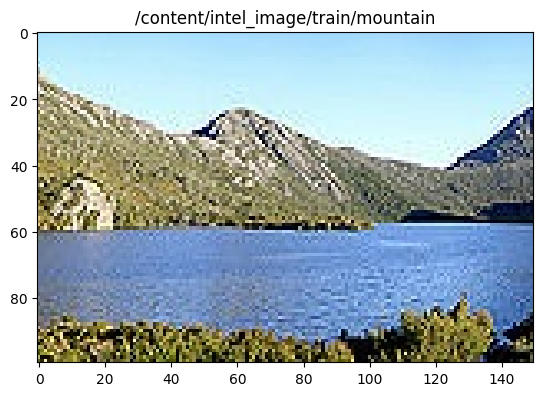

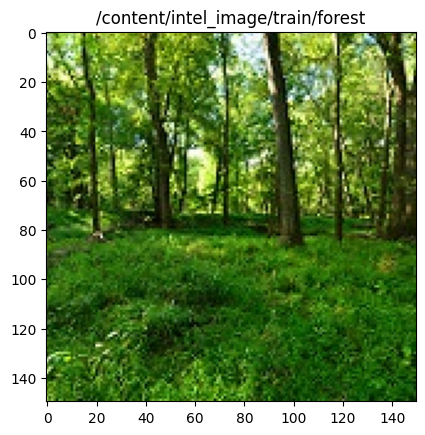

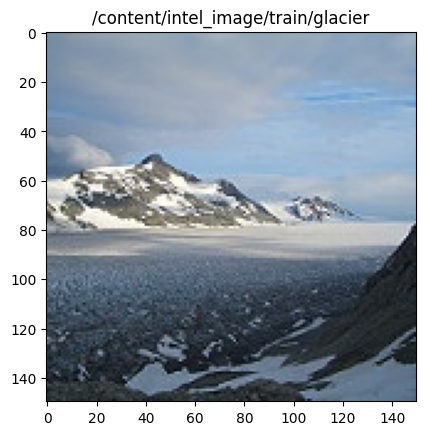

In [23]:
train_folders = ['/content/intel_image/train/mountain',
           '/content/intel_image/train/forest',
           '/content/intel_image/train/glacier']

for folder in train_folders:
    # Get a list of all the image files in the folder
    images = os.listdir(folder)

    # Select a random image file
    selected_image = random.choice(images)

    # Create the full image path
    image_path = os.path.join(folder, selected_image)

    # Open and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(folder)
    plt.show()


Terbukti, **resolusi gambar pada dataset tidak seragam**

In [34]:
#Val Data
val_mountain = '/content/intel_image/val/mountain'
val_forest = '/content/intel_image/val/forest'
val_glacier = '/content/intel_image/val/glacier'


print(f'Ada {count_images_in_folder(val_mountain)} images Mountain untuk val data.')
print(f'Ada {count_images_in_folder(val_forest)} images Forest untuk val data.')
print(f'Ada {count_images_in_folder(val_glacier)} images Glacier untuk val data.')
print("=========================================")
val_count = 0
for Obj in objects:
  path_count = '/content/intel_image/val/'
  val_count += count_images_in_folder(path_count + Obj)
print(f'Total ada {val_count} images untuk train data.')

Ada 800 images Mountain untuk val data.
Ada 800 images Forest untuk val data.
Ada 800 images Glacier untuk val data.
Total ada 2400 images untuk train data.


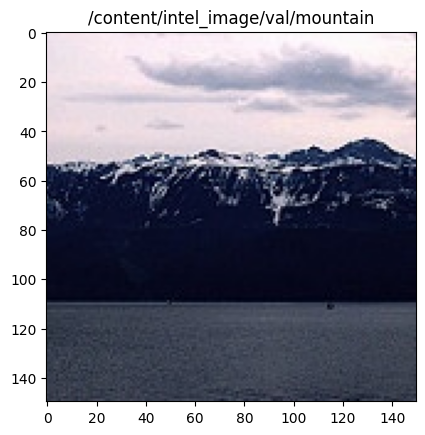

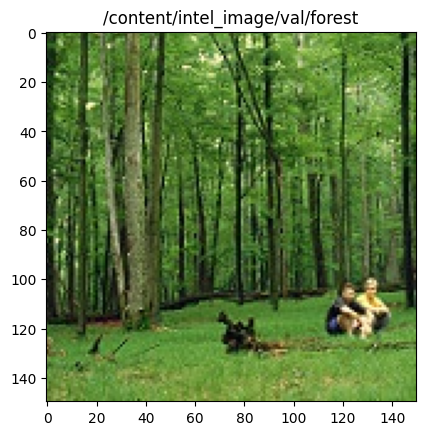

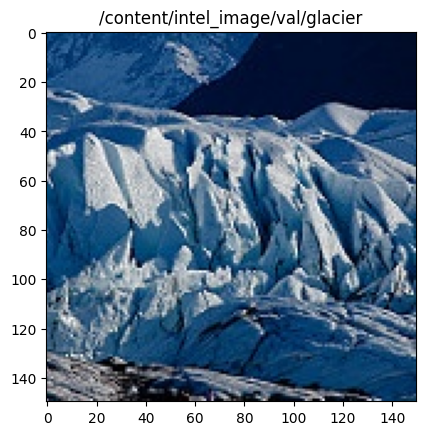

In [52]:
val_folders = ['/content/intel_image/val/mountain',
               '/content/intel_image/val/forest',
               '/content/intel_image/val/glacier']

for folder in val_folders:
    # Get a list of all the image files in the folder
    images = os.listdir(folder)

    # Select a random image file
    selected_image = random.choice(images)

    # Create the full image path
    image_path = os.path.join(folder, selected_image)

    # Open and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(folder)
    plt.show()


In [37]:
total_image = train_count + val_count
print(f'Total ada {total_image} images pada dataset ini')

Total ada 12000 images pada dataset ini


In [39]:
if (val_count/total_image) == val_rasio:
  print("Rasio sudah sesuai, yaitu sebesar 20%")
else:
  print("Rasio belum sesuai, belom sebesar 20%")

Rasio sudah sesuai, yaitu sebesar 20%


# Modelling

In [53]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.00001,
    zoom_range=0.01,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
train_batch_size = 64
val_batch_size = 32

In [55]:
train_generator = train_datagen.flow_from_directory('/content/intel_image/train',
                                                    target_size = (150, 150),
                                                    batch_size = train_batch_size, # 13, 26, 43 // 172, 86, 52
                                                    shuffle = True,
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('/content/intel_image/val',
                                                        target_size = (150, 150),
                                                        batch_size = val_batch_size, # 6, 9 , 18 // 93, 62, 31
                                                        class_mode = 'categorical')

Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.


In [58]:
Model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), use_bias = True, padding = 'same', input_shape = (150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), use_bias = True, padding = 'same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3, 3), use_bias = True, padding = 'same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(512, (3, 3), use_bias = True, padding = 'same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax',)
])


Terbukti, bahwa model menggunakan **model sequential**

Terbukti, bahwa model menggunakan **Conv2D Maxpooling Layer**

In [60]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 150, 150, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       7

In [61]:
class EarlyStopper(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("STOP || Model has reach 92% accuracy and and val accuracy")
      self.model.stop_training = True


In [62]:
EarlyStopper1= EarlyStopper()

Terbukti, saya menggunakan **Callback** untuk memberhentikan proses training jika sudah mencapai batas accuracy dan val_accuracy yang sudah ditentukan.

In [66]:
class TrainingPlot(keras.callbacks.Callback):

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_accuracy'))

        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:

            N = np.arange(0, len(self.losses))

            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()
            plt.close()

In [67]:
TrainingPlot1 = TrainingPlot()

Terbukti, saya menggunakan **plot** untuk memantau progress akurasi dan loss model saat proses training berlangsung

In [68]:
Optimizer=tf.optimizers.RMSprop(learning_rate=0.0001, momentum = 0.9)

Model.compile(loss = 'categorical_crossentropy',
              optimizer = Optimizer,
              metrics = ['accuracy'])

Epoch 1/150
150/150 - 85s - loss: 2.7551 - accuracy: 0.7265 - val_loss: 0.9742 - val_accuracy: 0.5404 - 85s/epoch - 566ms/step
Epoch 2/150


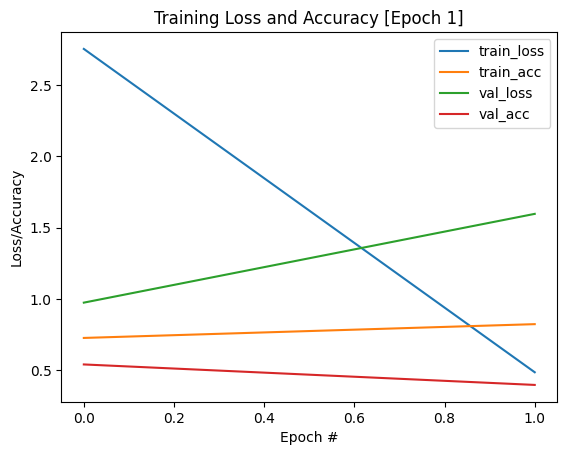

150/150 - 70s - loss: 0.4855 - accuracy: 0.8232 - val_loss: 1.5973 - val_accuracy: 0.3967 - 70s/epoch - 469ms/step
Epoch 3/150


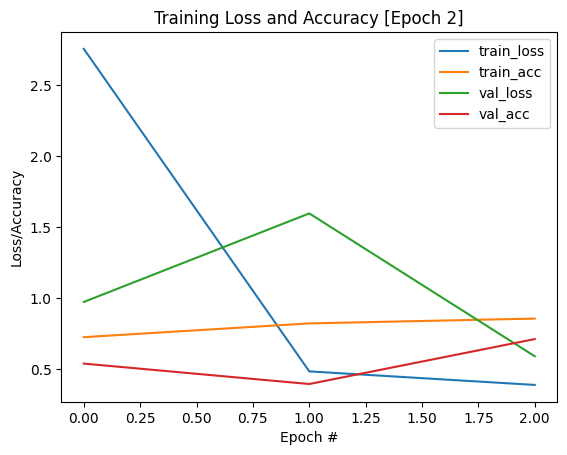

150/150 - 71s - loss: 0.3903 - accuracy: 0.8573 - val_loss: 0.5921 - val_accuracy: 0.7129 - 71s/epoch - 472ms/step
Epoch 4/150


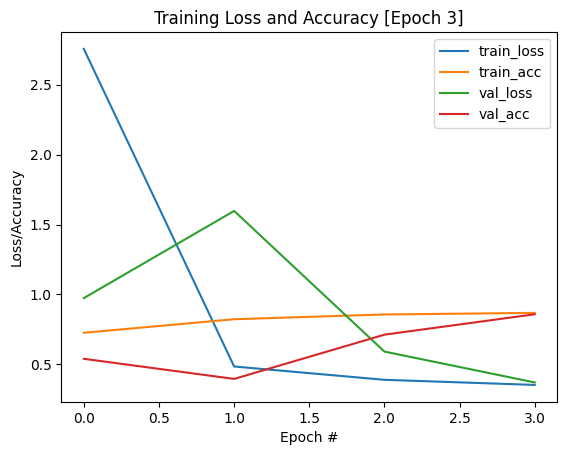

150/150 - 72s - loss: 0.3538 - accuracy: 0.8686 - val_loss: 0.3714 - val_accuracy: 0.8587 - 72s/epoch - 482ms/step
Epoch 5/150


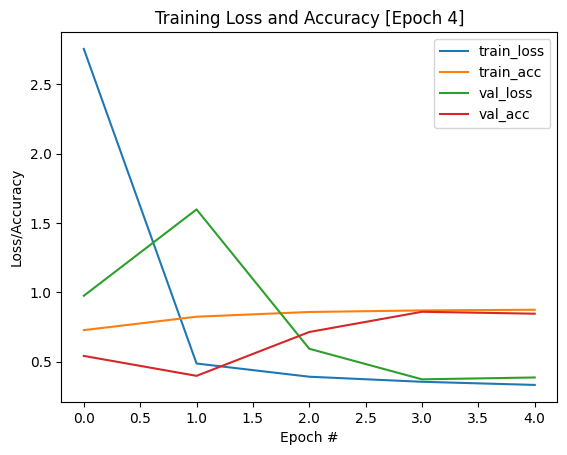

150/150 - 71s - loss: 0.3311 - accuracy: 0.8733 - val_loss: 0.3848 - val_accuracy: 0.8450 - 71s/epoch - 472ms/step
Epoch 6/150


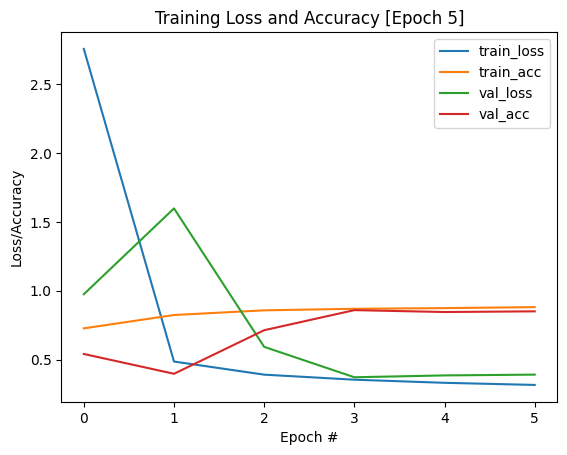

150/150 - 74s - loss: 0.3158 - accuracy: 0.8805 - val_loss: 0.3906 - val_accuracy: 0.8500 - 74s/epoch - 490ms/step
Epoch 7/150


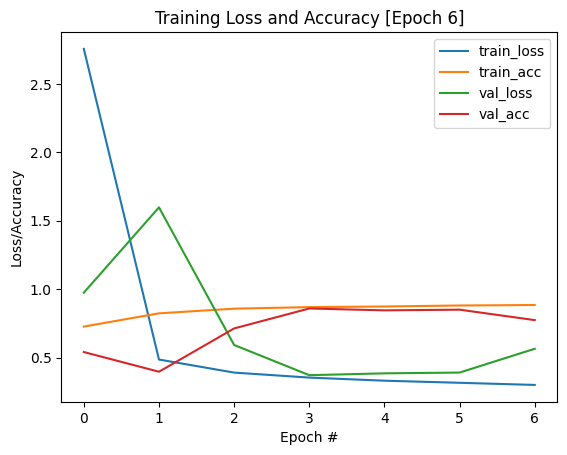

150/150 - 72s - loss: 0.3002 - accuracy: 0.8841 - val_loss: 0.5643 - val_accuracy: 0.7738 - 72s/epoch - 481ms/step
Epoch 8/150


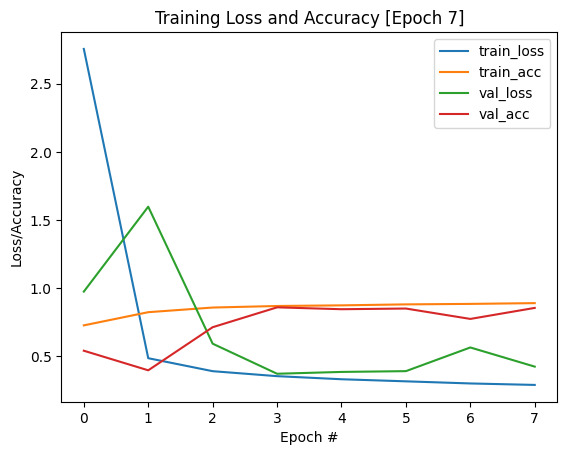

150/150 - 71s - loss: 0.2895 - accuracy: 0.8897 - val_loss: 0.4237 - val_accuracy: 0.8546 - 71s/epoch - 474ms/step
Epoch 9/150


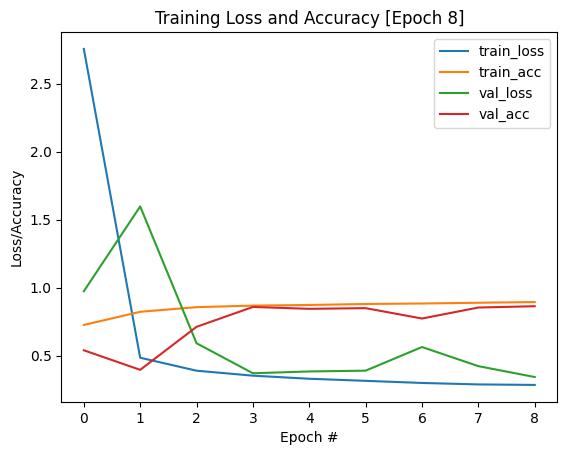

150/150 - 74s - loss: 0.2858 - accuracy: 0.8948 - val_loss: 0.3438 - val_accuracy: 0.8642 - 74s/epoch - 491ms/step
Epoch 10/150


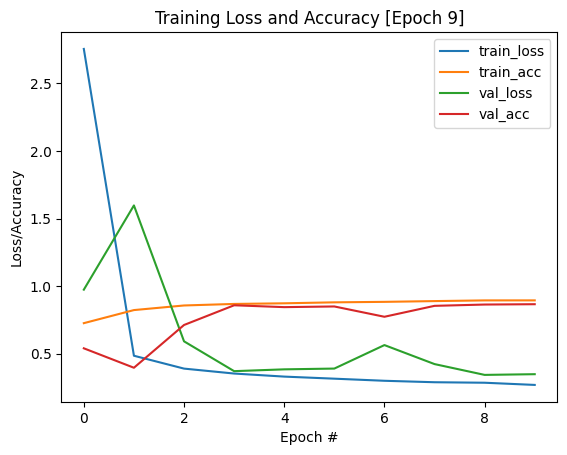

150/150 - 72s - loss: 0.2696 - accuracy: 0.8950 - val_loss: 0.3490 - val_accuracy: 0.8667 - 72s/epoch - 483ms/step
Epoch 11/150


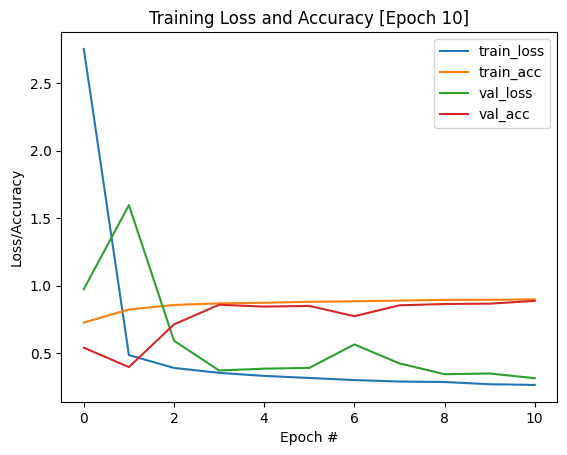

150/150 - 70s - loss: 0.2643 - accuracy: 0.8985 - val_loss: 0.3142 - val_accuracy: 0.8875 - 70s/epoch - 469ms/step
Epoch 12/150


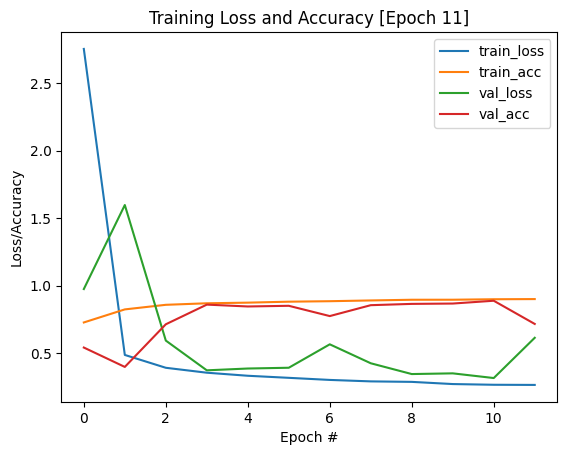

150/150 - 71s - loss: 0.2632 - accuracy: 0.8998 - val_loss: 0.6127 - val_accuracy: 0.7154 - 71s/epoch - 474ms/step
Epoch 13/150


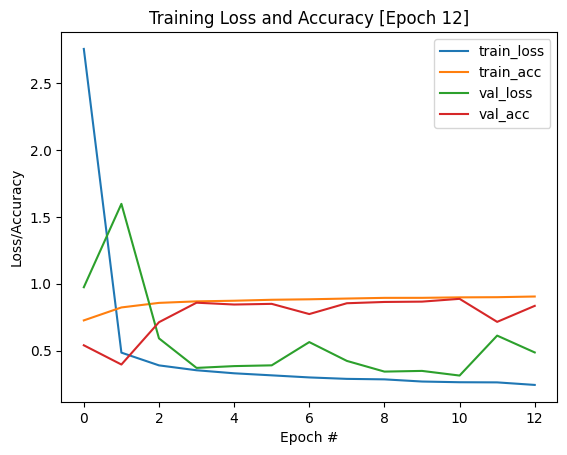

150/150 - 71s - loss: 0.2442 - accuracy: 0.9049 - val_loss: 0.4870 - val_accuracy: 0.8350 - 71s/epoch - 472ms/step
Epoch 14/150


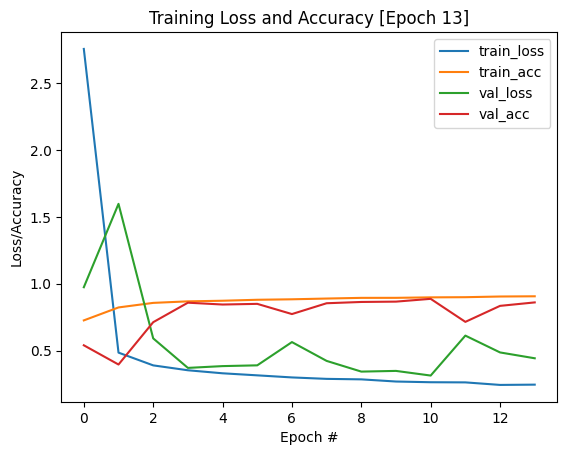

150/150 - 70s - loss: 0.2463 - accuracy: 0.9066 - val_loss: 0.4433 - val_accuracy: 0.8608 - 70s/epoch - 465ms/step
Epoch 15/150


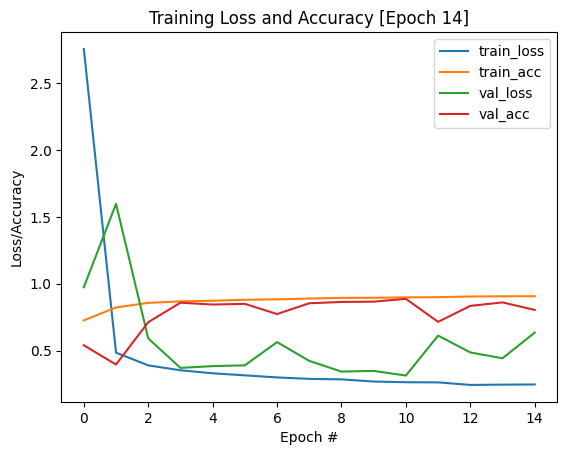

150/150 - 70s - loss: 0.2475 - accuracy: 0.9071 - val_loss: 0.6352 - val_accuracy: 0.8046 - 70s/epoch - 465ms/step
Epoch 16/150


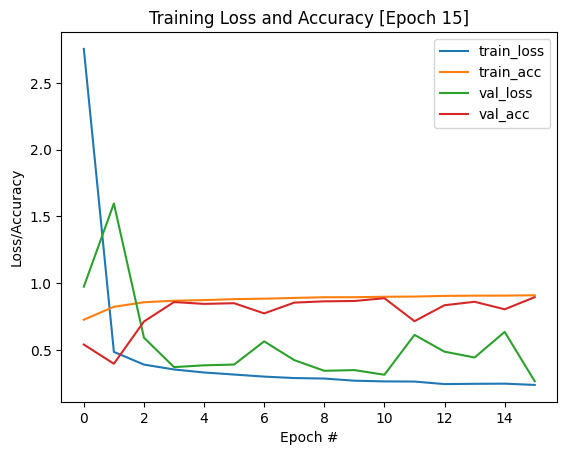

150/150 - 72s - loss: 0.2380 - accuracy: 0.9097 - val_loss: 0.2655 - val_accuracy: 0.8954 - 72s/epoch - 478ms/step
Epoch 17/150


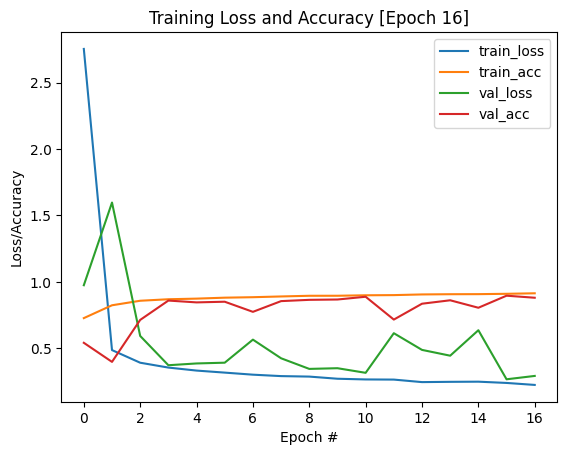

150/150 - 70s - loss: 0.2230 - accuracy: 0.9135 - val_loss: 0.2908 - val_accuracy: 0.8800 - 70s/epoch - 465ms/step
Epoch 18/150


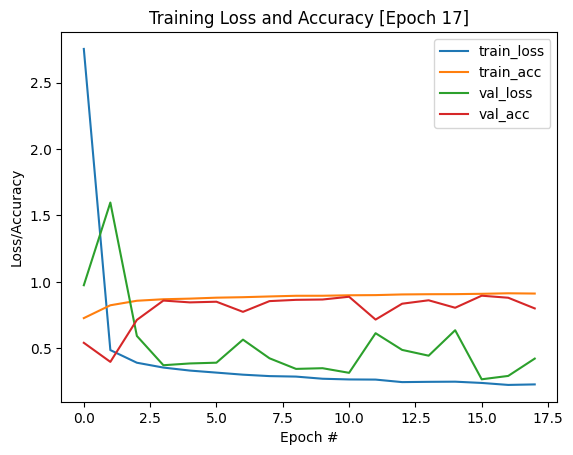

150/150 - 72s - loss: 0.2269 - accuracy: 0.9116 - val_loss: 0.4214 - val_accuracy: 0.7996 - 72s/epoch - 481ms/step
Epoch 19/150


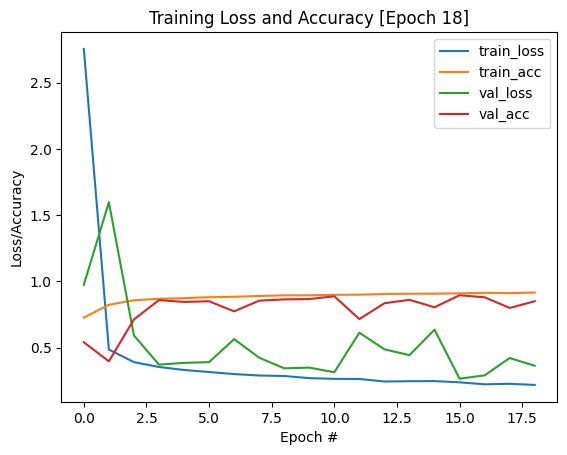

150/150 - 71s - loss: 0.2184 - accuracy: 0.9159 - val_loss: 0.3632 - val_accuracy: 0.8500 - 71s/epoch - 473ms/step
Epoch 20/150


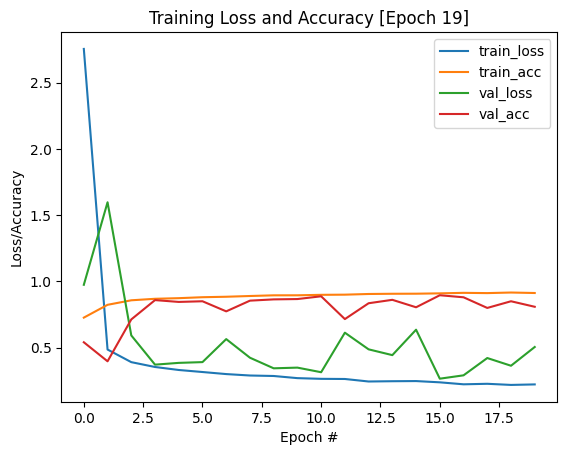

150/150 - 70s - loss: 0.2222 - accuracy: 0.9123 - val_loss: 0.5047 - val_accuracy: 0.8083 - 70s/epoch - 466ms/step
Epoch 21/150


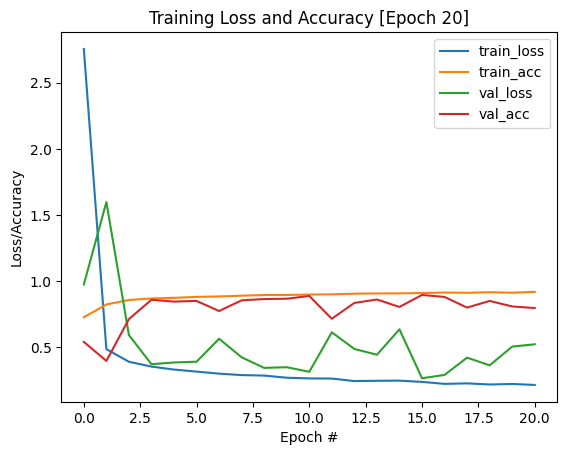

150/150 - 70s - loss: 0.2151 - accuracy: 0.9186 - val_loss: 0.5224 - val_accuracy: 0.7962 - 70s/epoch - 469ms/step
Epoch 22/150


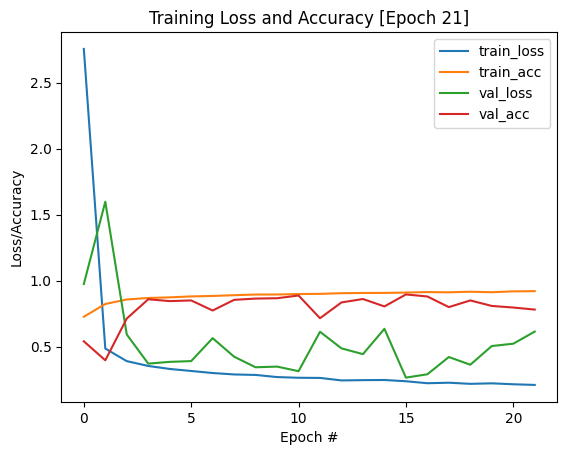

150/150 - 69s - loss: 0.2101 - accuracy: 0.9203 - val_loss: 0.6140 - val_accuracy: 0.7808 - 69s/epoch - 463ms/step
Epoch 23/150


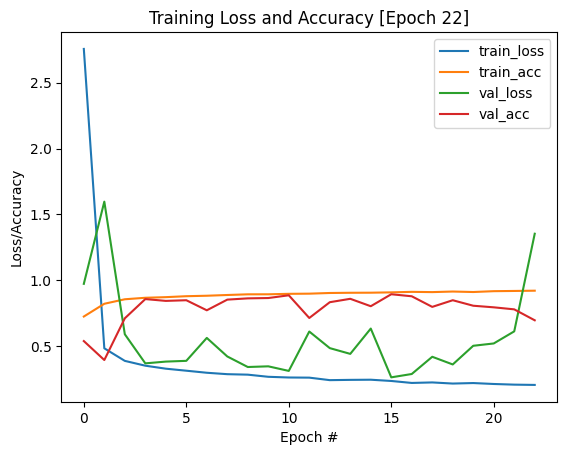

150/150 - 71s - loss: 0.2080 - accuracy: 0.9223 - val_loss: 1.3541 - val_accuracy: 0.6979 - 71s/epoch - 474ms/step
Epoch 24/150


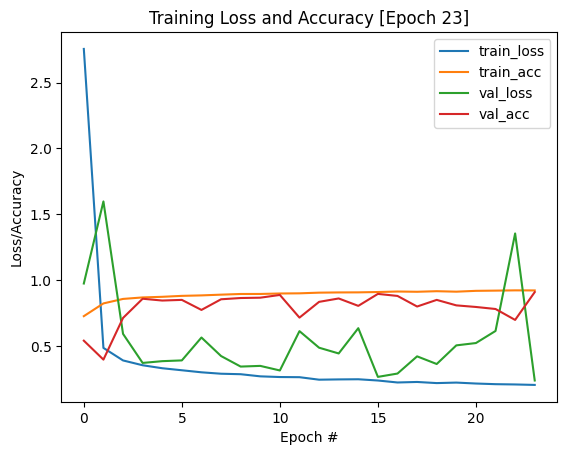

150/150 - 69s - loss: 0.2045 - accuracy: 0.9218 - val_loss: 0.2381 - val_accuracy: 0.9092 - 69s/epoch - 462ms/step
Epoch 25/150


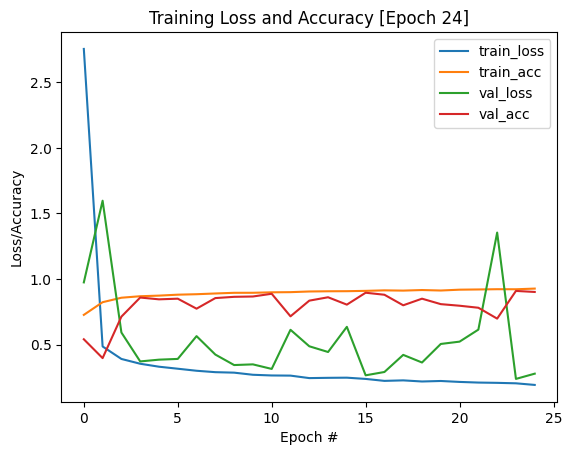

150/150 - 70s - loss: 0.1922 - accuracy: 0.9270 - val_loss: 0.2781 - val_accuracy: 0.9013 - 70s/epoch - 468ms/step
Epoch 26/150


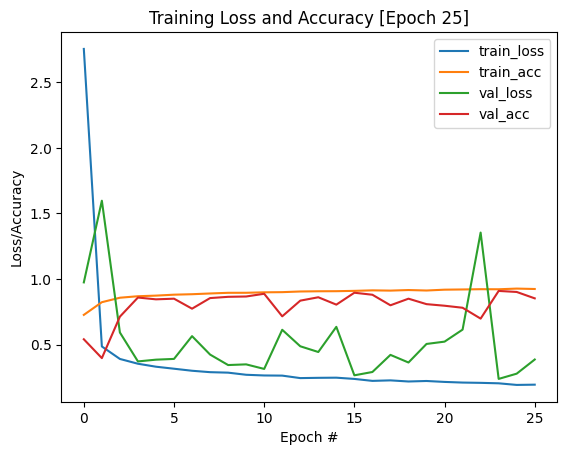

150/150 - 69s - loss: 0.1941 - accuracy: 0.9239 - val_loss: 0.3859 - val_accuracy: 0.8525 - 69s/epoch - 463ms/step
Epoch 27/150


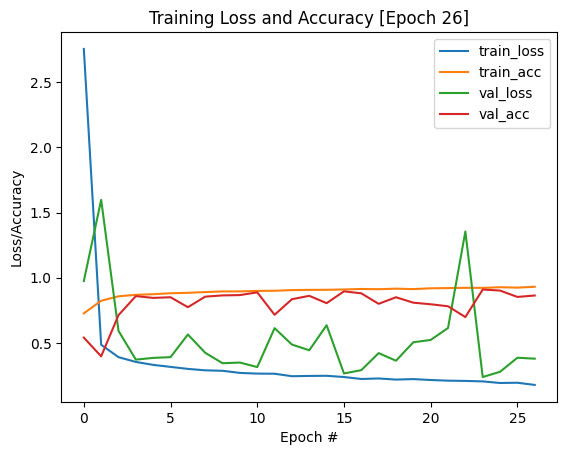

150/150 - 73s - loss: 0.1774 - accuracy: 0.9305 - val_loss: 0.3788 - val_accuracy: 0.8633 - 73s/epoch - 490ms/step
Epoch 28/150


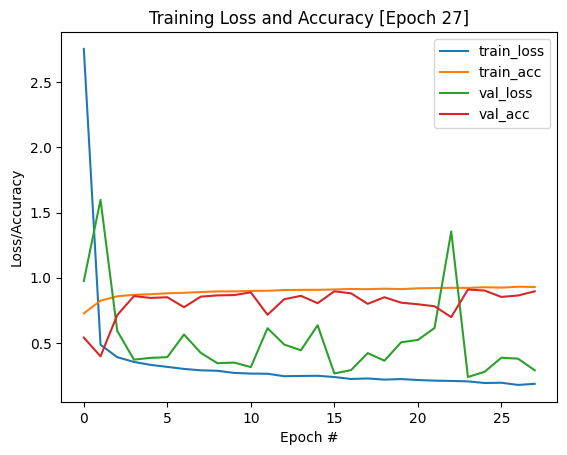

150/150 - 71s - loss: 0.1859 - accuracy: 0.9291 - val_loss: 0.2895 - val_accuracy: 0.8954 - 71s/epoch - 471ms/step
Epoch 29/150


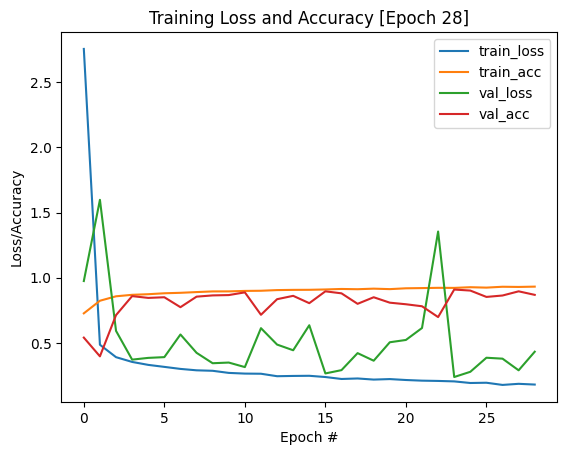

150/150 - 70s - loss: 0.1802 - accuracy: 0.9315 - val_loss: 0.4322 - val_accuracy: 0.8683 - 70s/epoch - 469ms/step
Epoch 30/150


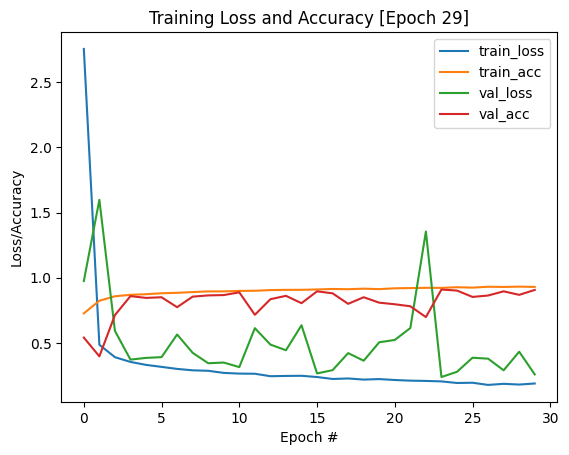

150/150 - 71s - loss: 0.1884 - accuracy: 0.9293 - val_loss: 0.2584 - val_accuracy: 0.9062 - 71s/epoch - 471ms/step
Epoch 31/150


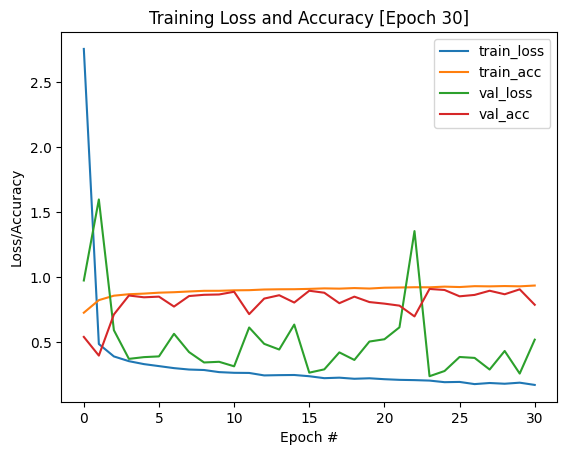

150/150 - 69s - loss: 0.1711 - accuracy: 0.9354 - val_loss: 0.5192 - val_accuracy: 0.7875 - 69s/epoch - 463ms/step
Epoch 32/150


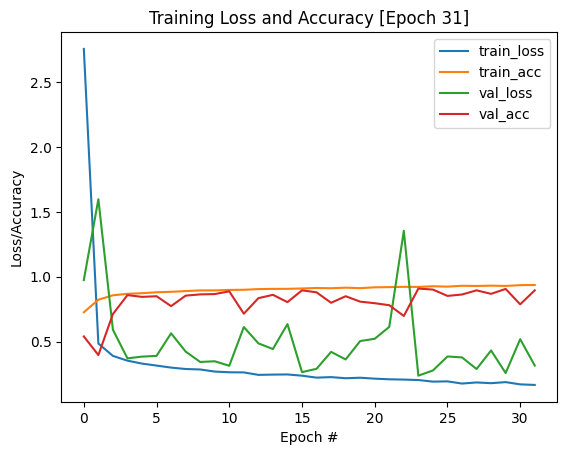

150/150 - 71s - loss: 0.1668 - accuracy: 0.9367 - val_loss: 0.3162 - val_accuracy: 0.8954 - 71s/epoch - 475ms/step
Epoch 33/150


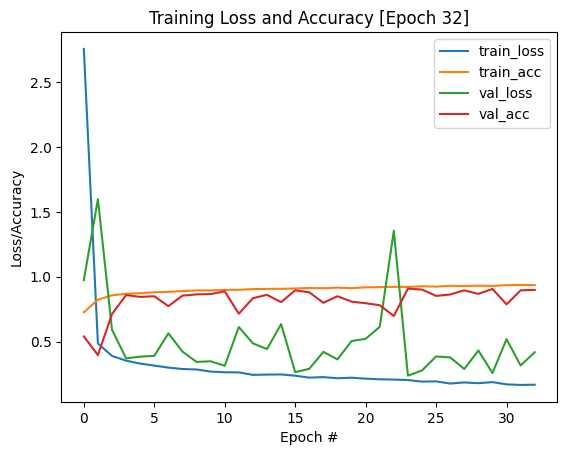

150/150 - 69s - loss: 0.1684 - accuracy: 0.9356 - val_loss: 0.4188 - val_accuracy: 0.8988 - 69s/epoch - 458ms/step
Epoch 34/150


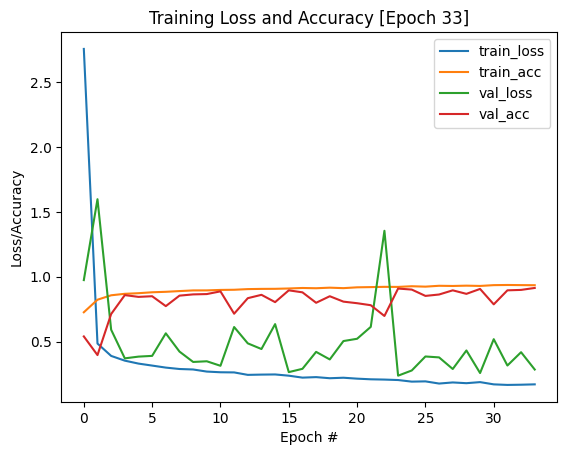

150/150 - 69s - loss: 0.1711 - accuracy: 0.9349 - val_loss: 0.2854 - val_accuracy: 0.9137 - 69s/epoch - 460ms/step
Epoch 35/150


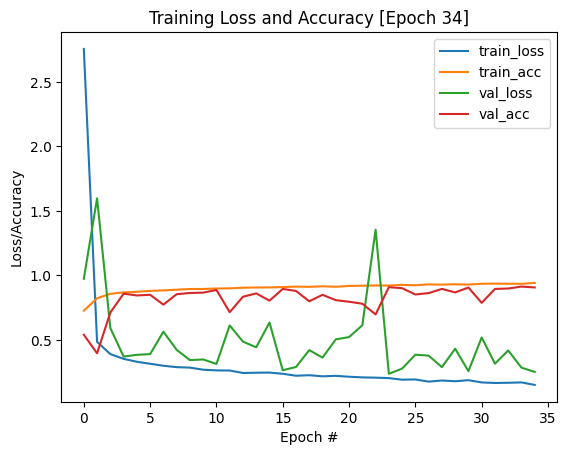

150/150 - 70s - loss: 0.1517 - accuracy: 0.9420 - val_loss: 0.2525 - val_accuracy: 0.9071 - 70s/epoch - 467ms/step
Epoch 36/150


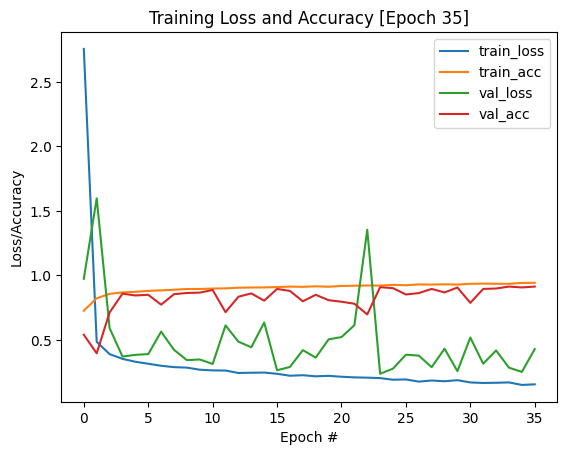

150/150 - 71s - loss: 0.1562 - accuracy: 0.9429 - val_loss: 0.4291 - val_accuracy: 0.9137 - 71s/epoch - 472ms/step
Epoch 37/150


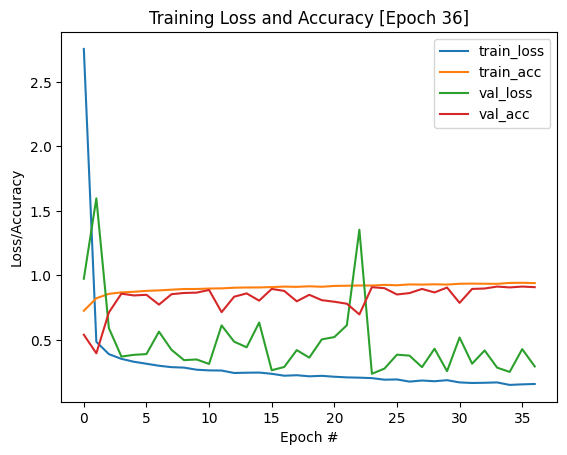

150/150 - 71s - loss: 0.1590 - accuracy: 0.9406 - val_loss: 0.2951 - val_accuracy: 0.9092 - 71s/epoch - 472ms/step
Epoch 38/150


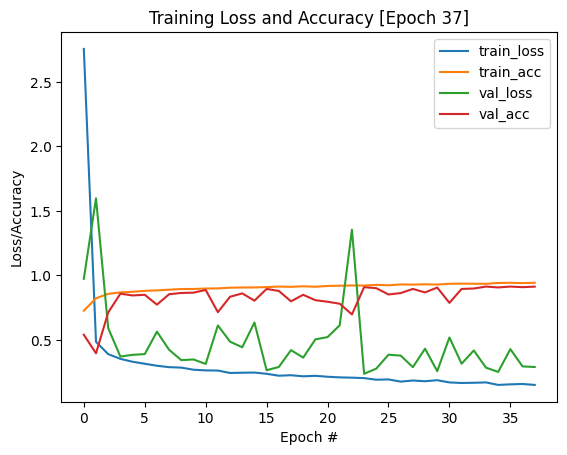

150/150 - 73s - loss: 0.1518 - accuracy: 0.9433 - val_loss: 0.2906 - val_accuracy: 0.9133 - 73s/epoch - 488ms/step
Epoch 39/150


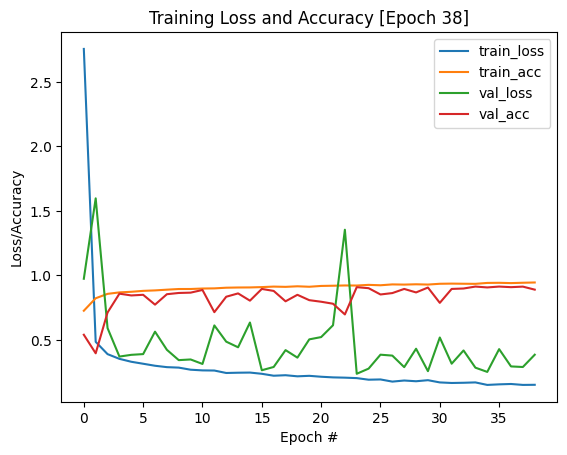

150/150 - 70s - loss: 0.1526 - accuracy: 0.9454 - val_loss: 0.3858 - val_accuracy: 0.8900 - 70s/epoch - 468ms/step
Epoch 40/150
STOP || Model has reach 92% accuracy and and val accuracy


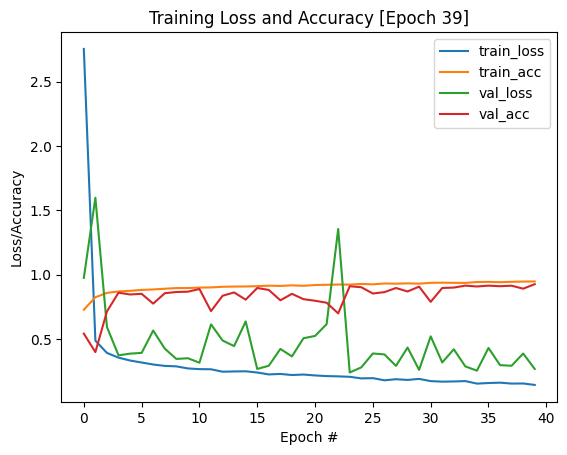

150/150 - 73s - loss: 0.1414 - accuracy: 0.9463 - val_loss: 0.2655 - val_accuracy: 0.9250 - 73s/epoch - 487ms/step


In [69]:
Model.fit(train_generator,
          epochs = 150,
          steps_per_epoch = train_count // train_batch_size,
          validation_data = validation_generator,
          validation_steps = val_count // val_batch_size,
          callbacks = [EarlyStopper1, TrainingPlot1],
          verbose = 2)

In [71]:
exp_folder = 'saved-model/'
tf.saved_model.save(Model, exp_folder)

In [72]:
SM_converter = tf.lite.TFLiteConverter.from_saved_model('saved-model/')
SM_tflite_model = SM_converter.convert()

with tf.io.gfile.GFile('SM-Mountain-Forest-Glacier_Classification.tflite', 'wb') as f:
    f.write(SM_tflite_model)

==== Kesimpulan ====

Seluruh proses berhasil dijalankan menggunakan Dataset yang **belum pernah digunakan pada submission kelas machine learning sebelumnya**. Selain itu, dataset yang digunakan berjumlah **12000 gambar** (lebih besar dari 10000 gambar) dari gabungan dua dataset berbeda. Kemudian, dataset tersebut **memiliki resolusi yang tidak seragam** atau berbeda beda. Selanjutnya, **Dataset juga dibagi menjadi 80% train dan 20% train set.**


Dataset ini digunakan untuk membangun model klasifikasi pemandangan dengan **3 kelas atau label berbeda**, yaitu **Mountain, Forest, dan Glacier**


Pada proses training, saya menggunakan **model sequential** yang memiliki layers **Conv2D Maxpooling Layer**. Kemudian, saya juga menambahkan 2 **Callback**, yang pertama adalah **EarlyStopper** dan yang kedua adalah **Plot Training**.


Hasil dari proses training memberikan hasil yang **sangat bagus**, yaitu **accuracy** pada training set sebesar **94,6%** dan accuracy pada validation set (**val_accuracy**) sebesar **92,5%**.


Terakhir, model disimpan dalam bentuk atau **format SavedModel** **dikonversi** menjadi format **.tflite** yang berjudul
**"SM-Mountain-Forest-Glacier_Classification.tflite"**